# Answer to NRM


In [ ]:
import sympy as sp

while True:
    x = sp.Symbol('x')
    function = input("Enter function :")
    function = sp.sympify(function)

    # Initial guess
    x0 = float(input("Enter initial guess for equation :"))

    # Tolerance for convergence
    tolerance = 0.0000001

    # Maximum number of iterations
    max_iterations = 10

    # Define the symbolic variable and the function
    def newton_raphson(function, x0, tolerance, max_iterations):
        # Define the derivative of the function
        function_derivative = sp.diff(function, x)

        # Start the Newton-Raphson iteration
        for iteration in range(max_iterations):
            f_value = function.subs(x, x0)
            f_prime_value = function_derivative.subs(x, x0)

            if abs(f_prime_value) < tolerance:
                print("Derivative is close to zero. Cannot continue.")
                break

            x1 = x0 - f_value / f_prime_value
            print(f"Iteration {iteration + 1}:")
            print(f"x0 = {x0}")
            print(f"x1 = {x1}")

            if abs(x1 - x0) < tolerance:
                print("Converged to a root:", x1)
                break

            x0 = x1

        else:
            print("Did not converge after", max_iterations, "iterations.")

    # Call the function to execute the Newton-Raphson method
    newton_raphson(function, x0, tolerance, max_iterations)
    
    reply = input("Enter YES to enter more equations:")
    if reply != "YES":
        break


Enter function :exp(x)*ln(x) - x**2
Enter initial guess for equation :3
Iteration 1:
x0 = 3.0
x1 = 2.42594833340262
Iteration 2:
x0 = 2.42594833340262
x1 = 2.00503947287231
Iteration 3:
x0 = 2.00503947287231
x1 = 1.76922195352029
Iteration 4:
x0 = 1.76922195352029
x1 = 1.69982787379819
Iteration 5:
x0 = 1.69982787379819
x1 = 1.69462816996364
Iteration 6:
x0 = 1.69462816996364
x1 = 1.69460092124756
Iteration 7:
x0 = 1.69460092124756
x1 = 1.69460092050355
Converged to a root: 1.69460092050355


# GAUSS LEGENDRE VS TRAPEZOIDAL

In [3]:
import numpy as np

#Trapezoidal Rule

def trapezoidal_rule(func, a, b, num_points):
    x_values = np.linspace(a, b, num_points)
    y_values = func(x_values)
    h = (b - a) / (num_points - 1)
    result = h * (0.5 * y_values[0] + sum(y_values[1:-1]) + 0.5 * y_values[-1])
    return result

# Define the function
def integrand(x):
    return 1 / (x * np.log(x))

# Integration limits
a = np.e
b = np.e + 1

# Number of points for the trapezoidal rule
num_points_trapezoidal = 5

# Approximate the integral using the trapezoidal rule
approximation_trapezoidal = trapezoidal_rule(integrand, a, b, num_points_trapezoidal)

print("Approximation using Trapezoidal Rule:", approximation_trapezoidal)


#Gauss-Legendre

# Given weights and abscissas for Gauss-Legendre method
weights = [0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]
abscissas = [-0.90617985, -0.53846931, 0, 0.53846931, 0.90617985]

def gauss_legendre_method(func, weights, abscissas):
    result = sum(w * func(x) for w, x in zip(weights, abscissas))
    return result
def integrand_new(x):
    aa = (b-a)/2
    ab = (a+b)/2
    return aa*(1 / ((aa*x+ab) * np.log(aa*x+ab)))

# Approximate the integral using the Gauss-Legendre method
approximation_gauss_legendre = gauss_legendre_method(integrand_new, weights, abscissas)

print("Approximation using Gauss-Legendre Method:", approximation_gauss_legendre)


Approximation using Trapezoidal Rule: 0.2734154121758122
Approximation using Gauss-Legendre Method: 0.27251388169104535


# TRAPEZOIDAL VS GAUSS LEGENDRE

In [4]:
def trapezoidal_rule(func, a, b, num_points):
    x_values = np.linspace(a, b, num_points)
    y_values = func(x_values)
    h = (b - a) / (num_points - 1)
    result = h * (0.5 * y_values[0] + sum(y_values[1:-1]) + 0.5 * y_values[-1])
    return result

# Define the function
def integrand(x):
    s = np.sin(x)
    c = np.cos(x)
    return np.log(c) * np.e**(s)

# Integration limits
a = 0
b = np.pi/2

# Number of points for the trapezoidal rule
num_points_trapezoidal = 5

# Approximate the integral using the trapezoidal rule
approximation_trapezoidal = trapezoidal_rule(integrand, a, b, num_points_trapezoidal)

print("Approximation using Trapezoidal Rule:", approximation_trapezoidal)


#Gauss-Legendre

# Given weights and abscissas for Gauss-Legendre method
weights = [0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]
abscissas = [-0.90617985, -0.53846931, 0, 0.53846931, 0.90617985]

def gauss_legendre_method(func, weights, abscissas):
    result = sum(w * func(x) for w, x in zip(weights, abscissas))
    return result
def integrand_new(x):
    aa = (b-a)/2
    ab = (a+b)/2
    s = np.sin(aa*x+ab)
    c = np.cos(aa*x+ab)
    return np.log(c) * np.e**(s)
# Approximate the integral using the Gauss-Legendre method
approximation_gauss_legendre = gauss_legendre_method(integrand_new, weights, abscissas)

print("Approximation using Gauss-Legendre Method:", approximation_gauss_legendre)



Approximation using Trapezoidal Rule: -21.19706800493731
Approximation using Gauss-Legendre Method: -3.386055628553817


# GAUSS LEGENDRE VS MONTE CARLO (TAKE AVG)


In [5]:
import numpy as np

# Given weights and abscissas for Gauss-Legendre method
weights = [0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]
abscissas = [-0.90617985, -0.53846931, 0, 0.53846931, 0.90617985]

# Function to integrate
def integrand(x):
    return np.exp(-np.cos(x)**2) / np.sqrt(1 - x**2)

# Gauss-Legendre method
def gauss_legendre_method(integrand, weights, abscissas):
    result = sum(w * integrand(x) for w, x in zip(weights, abscissas))
    return result

# Approximate the integral using the Gauss-Legendre method
approximation_gauss_legendre = gauss_legendre_method(integrand, weights, abscissas)

print("Approximation using Gauss-Legendre Method:", approximation_gauss_legendre)

import numpy as np

# Function to integrate
def integrand(x):
    return np.exp(-np.cos(x)**2) / np.sqrt(1 - x**2)

# Monte Carlo method
def monte_carlo_method(integrand, num_points):
    random_points = np.random.uniform(-1, 1, num_points)
    result = np.mean(integrand(random_points))
    return result

# Generate 10 random points and approximate the integral using Monte Carlo method
approximation_monte_carlo = monte_carlo_method(integrand, num_points=10)

print("Approximation using Monte Carlo Method:", approximation_monte_carlo)



Approximation using Gauss-Legendre Method: 1.5188850172519208
Approximation using Monte Carlo Method: 0.9674542596026953


# RK4 VS EULER

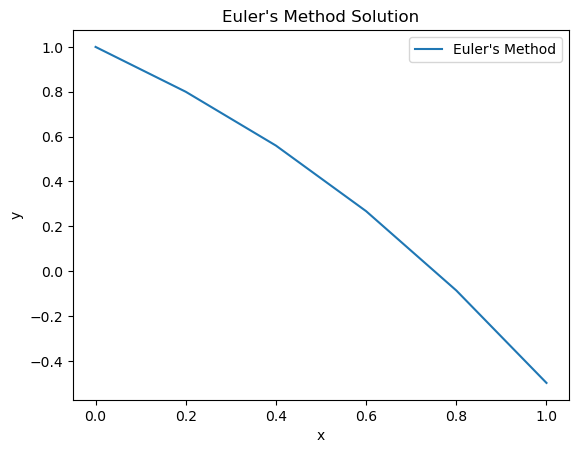

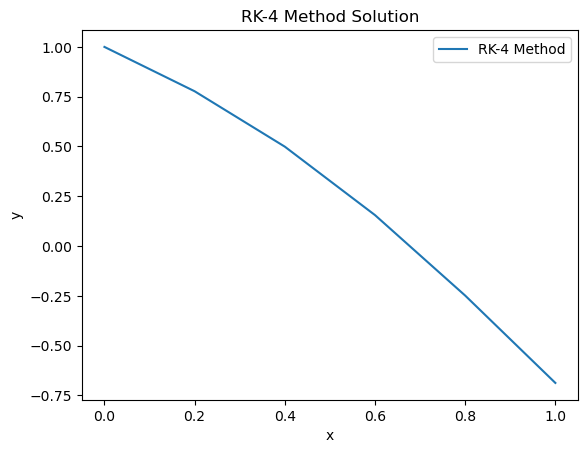

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function representing the differential equation: y' = xy + y^2 - 2
def differential_equation(x, y):
    return x * y + y**2 - 2

# Euler's method
def euler_method(f, x0, y0, h, n):
    x_values = [x0 + i * h for i in range(n+1)]
    y_values = [y0]

    for i in range(n):
        y0 = y0 + h * f(x_values[i], y0)
        y_values.append(y0)

    return x_values, y_values

# Initial conditions
x0 = 0
y0 = 1
h = 0.2
n = int(1 / h)  # Number of steps

# Solve using Euler's method
x_euler, y_euler = euler_method(differential_equation, x0, y0, h, n)

# Plot the results
plt.plot(x_euler, y_euler, label='Euler\'s Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler\'s Method Solution')
plt.legend()
plt.show()


# RK-4 method
def runge_kutta_4th_order(f, x0, y0, h, n):
    x_values = [x0 + i * h for i in range(n+1)]
    y_values = [y0]

    for i in range(n):
        k1 = h * f(x_values[i], y_values[i])
        k2 = h * f(x_values[i] + h/2, y_values[i] + k1/2)
        k3 = h * f(x_values[i] + h/2, y_values[i] + k2/2)
        k4 = h * f(x_values[i] + h, y_values[i] + k3)

        y0 = y0 + (k1 + 2*k2 + 2*k3 + k4) / 6
        y_values.append(y0)

    return x_values, y_values

# Solve using RK-4 method
x_rk4, y_rk4 = runge_kutta_4th_order(differential_equation, x0, y0, h, n)

# Plot the results
plt.plot(x_rk4, y_rk4, label='RK-4 Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK-4 Method Solution')
plt.legend()
plt.show()




# MASS SPRING RK4 VS EULER


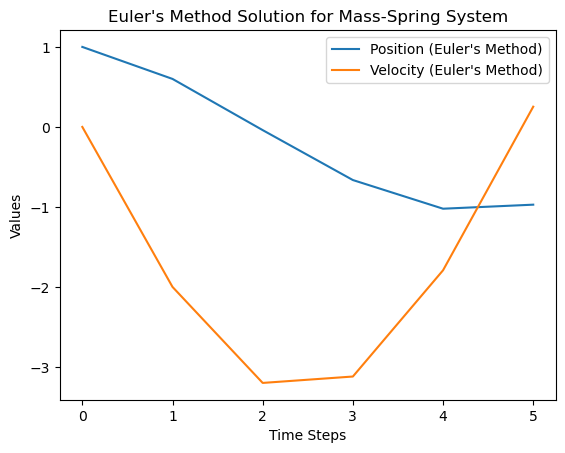

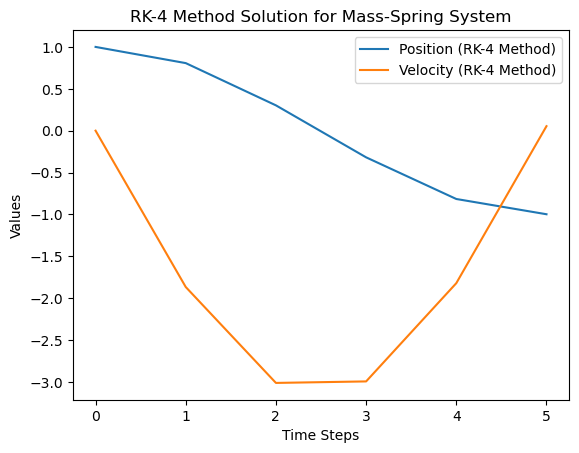

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1  # mass
k = 10  # spring constant
x0 = 1  # initial position
v0 = 0  # initial velocity
h = 0.2  # step size
t_end = 1  # end time

# Function representing the system of ODEs
def mass_spring_system_euler(x0, v0, h, t_end):
    # Initial conditions
    x = x0
    v = v0

    # Lists to store results
    x_values = [x0]
    v_values = [v0]

    # Euler's method
    for t in np.arange(0, t_end, h):
        a = -k / m * x  # acceleration from the spring force
        v = v + h * a  # update velocity
        x = x + h * v  # update position

        # Store results
        x_values.append(x)
        v_values.append(v)

    return x_values, v_values

# Solve using Euler's method
x_euler, v_euler = mass_spring_system_euler(x0, v0, h, t_end)

# Plot the results
plt.plot(x_euler, label='Position (Euler\'s Method)')
plt.plot(v_euler, label='Velocity (Euler\'s Method)')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Euler\'s Method Solution for Mass-Spring System')
plt.legend()
plt.show()

# Function representing the system of ODEs
def mass_spring_system_rk4(x0, v0, h, t_end):
    # Initial conditions
    x = x0
    v = v0

    # Lists to store results
    x_values = [x0]
    v_values = [v0]

    # RK-4 method
    for t in np.arange(0, t_end, h):
        # First step
        k1x = h * v
        k1v = h * (-k / m * x)

        # Second step
        k2x = h * (v + k1v / 2)
        k2v = h * (-k / m * (x + k1x / 2))

        # Third step
        k3x = h * (v + k2v / 2)
        k3v = h * (-k / m * (x + k2x / 2))

        # Fourth step
        k4x = h * (v + k3v)
        k4v = h * (-k / m * (x + k3x))

        # Update position and velocity
        x = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
        v = v + (k1v + 2 * k2v + 2 * k3v + k4v) / 6

        # Store results
        x_values.append(x)
        v_values.append(v)

    return x_values, v_values

# Solve using RK-4 method
x_rk4, v_rk4 = mass_spring_system_rk4(x0, v0, h, t_end)

# Plot the results
plt.plot(x_rk4, label='Position (RK-4 Method)')
plt.plot(v_rk4, label='Velocity (RK-4 Method)')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('RK-4 Method Solution for Mass-Spring System')
plt.legend()
plt.show()



## MONTE CARLO NUCLEAR DECAY

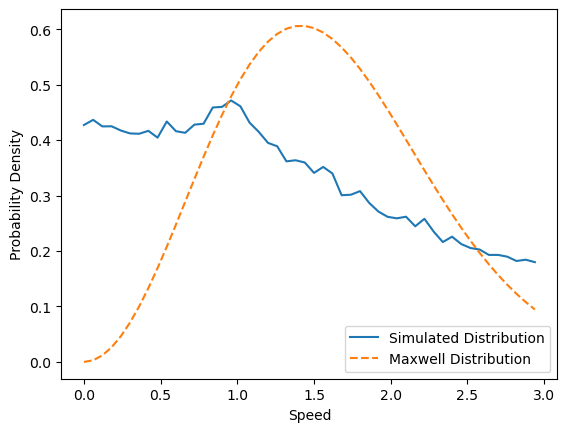

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kB = 1.0  # Boltzmann constant (in reduced units)
m = 1.0   # Mass of the particles (in reduced units)

# Simulation parameters
num_particles = 1000
time_steps = 1000
dt = 0.01

# Initial speed of particles
initial_speed = 1.0

# Binning for speed distribution
num_bins = 50
bin_edges = np.linspace(0, 3, num_bins + 1)

# Arrays to store speed distribution
speed_distribution_simulated = np.zeros(num_bins)
speed_distribution_maxwell = np.zeros(num_bins)

# Function to calculate Maxwell-Boltzmann distribution
def maxwell_distribution(v):
    return (4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kB))) / (kB**(3/2))

# Molecular dynamics simulation
velocities = initial_speed * np.ones(num_particles)

for step in range(time_steps):
    # Update velocities using simple integration
    velocities += np.random.normal(0, np.sqrt(kB / m), num_particles) * np.sqrt(dt)

    # Record speed distribution after every 10 time steps
    if step % 10 == 0:
        # Calculate speed for each particle
        speeds = np.abs(velocities)

        # Update simulated speed distribution
        speed_distribution_simulated += np.histogram(speeds, bins=bin_edges)[0]

        # Update Maxwell distribution
        speed_distribution_maxwell += maxwell_distribution(bin_edges[:-1])

# Normalize the distributions
speed_distribution_simulated /= np.sum(speed_distribution_simulated) * (bin_edges[1] - bin_edges[0])
speed_distribution_maxwell /= np.sum(speed_distribution_maxwell) * (bin_edges[1] - bin_edges[0])

# Plot the results
plt.plot(bin_edges[:-1], speed_distribution_simulated, label='Simulated Distribution')
plt.plot(bin_edges[:-1], speed_distribution_maxwell, label='Maxwell Distribution', linestyle='--')
plt.xlabel('Speed')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## IMPORTANCE FUNCTION, SOLVE A 

Simulated Speed Distribution:
[0.42267476 0.41424235 0.39674509 0.40538831 0.42204233 0.42520449
 0.42836664 0.44143688 0.4152964  0.43469095 0.42457205 0.43089637
 0.4397504  0.44607471 0.44417742 0.45745847 0.47537735 0.43384771
 0.42393962 0.39969643 0.3908424  0.38725862 0.37292352 0.35901003
 0.34678303 0.34657222 0.3541614  0.31600472 0.31368581 0.31916688
 0.29787503 0.29829665 0.27805886 0.26709672 0.25803187 0.27932372
 0.2584535  0.25360486 0.22957248 0.22619951 0.2198752  0.20785901
 0.20912387 0.20575091 0.19605363 0.19647525 0.16780504 0.18551311
 0.17897799 0.16443208]


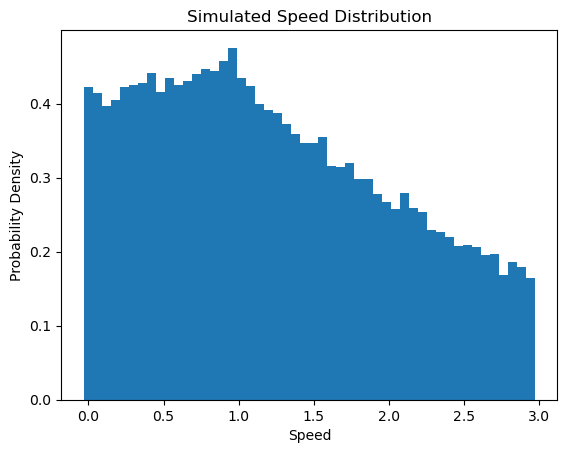

In [9]:
import numpy as np

# Constants
kB = 1.0  # Boltzmann constant (in reduced units)
m = 1.0   # Mass of the particles (in reduced units)

# Simulation parameters
num_particles = 1000
time_steps = 1000
dt = 0.01

# Initial speed of particles
initial_speed = 1.0

# Binning for speed distribution
num_bins = 50
bin_edges = np.linspace(0, 3, num_bins + 1)

# Array to store speed distribution
speed_distribution_simulated = np.zeros(num_bins)

# Molecular dynamics simulation
velocities = initial_speed * np.ones(num_particles)

for step in range(time_steps):
    # Update velocities using simple integration
    velocities += np.random.normal(0, np.sqrt(kB / m), num_particles) * np.sqrt(dt)

    # Record speed distribution after every 10 time steps
    if step % 10 == 0:
        # Calculate speed for each particle
        speeds = np.abs(velocities)

        # Update simulated speed distribution
        speed_distribution_simulated += np.histogram(speeds, bins=bin_edges)[0]

# Normalize the distribution
speed_distribution_simulated /= np.sum(speed_distribution_simulated) * (bin_edges[1] - bin_edges[0])

# Display the final simulated speed distribution
print("Simulated Speed Distribution:")
print(speed_distribution_simulated)
# Plotting the simulated speed distribution
plt.bar(bin_edges[:-1], speed_distribution_simulated, width=(bin_edges[1] - bin_edges[0]))
plt.xlabel('Speed')
plt.ylabel('Probability Density')
plt.title('Simulated Speed Distribution')
plt.show()

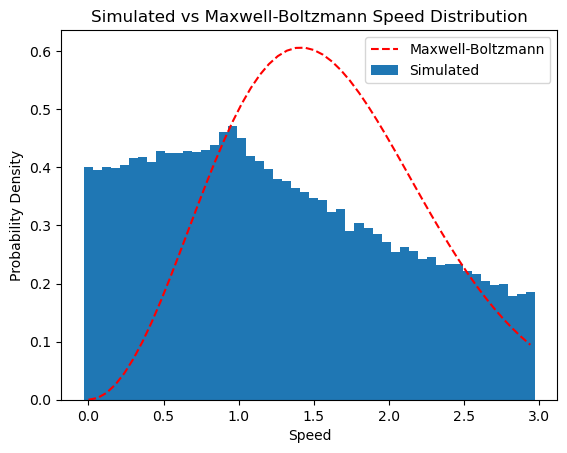

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kB = 1.0  # Boltzmann constant (in reduced units)
m = 1.0   # Mass of the particles (in reduced units)

# Simulation parameters
num_particles = 1000
time_steps = 1000
dt = 0.01

# Initial speed of particles
initial_speed = 1.0

# Binning for speed distribution
num_bins = 50
bin_edges = np.linspace(0, 3, num_bins + 1)

# Arrays to store speed distributions
speed_distribution_simulated = np.zeros(num_bins)
speed_distribution_maxwell = np.zeros(num_bins)

# Function to calculate Maxwell-Boltzmann distribution
def maxwell_distribution(v):
    return (4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kB))) / (kB**(3/2))

# Molecular dynamics simulation
velocities = initial_speed * np.ones(num_particles)

for step in range(time_steps):
    # Update velocities using simple integration
    velocities += np.random.normal(0, np.sqrt(kB / m), num_particles) * np.sqrt(dt)

    # Record speed distribution after every 10 time steps
    if step % 10 == 0:
        # Calculate speed for each particle
        speeds = np.abs(velocities)

        # Update simulated speed distribution
        speed_distribution_simulated += np.histogram(speeds, bins=bin_edges)[0]

        # Update Maxwell distribution
        speed_distribution_maxwell += maxwell_distribution(bin_edges[:-1])

# Normalize the distributions
speed_distribution_simulated /= np.sum(speed_distribution_simulated) * (bin_edges[1] - bin_edges[0])
speed_distribution_maxwell /= np.sum(speed_distribution_maxwell) * (bin_edges[1] - bin_edges[0])

# Plotting the simulated and Maxwell speed distributions
plt.bar(bin_edges[:-1], speed_distribution_simulated, width=(bin_edges[1] - bin_edges[0]), label='Simulated')
plt.plot(bin_edges[:-1], speed_distribution_maxwell, label='Maxwell-Boltzmann', linestyle='--', color='red')
plt.xlabel('Speed')
plt.ylabel('Probability Density')
plt.title('Simulated vs Maxwell-Boltzmann Speed Distribution')
plt.legend()
plt.show()


Tabulated Number of Atoms in Each Bin:
Speed Range		Number of Atoms
0.00 - 0.06		2014
0.06 - 0.12		2034
0.12 - 0.18		1909
0.18 - 0.24		1961
0.24 - 0.30		1897
0.30 - 0.36		2000
0.36 - 0.42		1990
0.42 - 0.48		2028
0.48 - 0.54		2012
0.54 - 0.60		1933
0.60 - 0.66		1950
0.66 - 0.72		2026
0.72 - 0.78		1933
0.78 - 0.84		1943
0.84 - 0.90		2119
0.90 - 0.96		2238
0.96 - 1.02		2202
1.02 - 1.08		2121
1.08 - 1.14		2063
1.14 - 1.20		1868
1.20 - 1.26		1835
1.26 - 1.32		1769
1.32 - 1.38		1745
1.38 - 1.44		1713
1.44 - 1.50		1714
1.50 - 1.56		1613
1.56 - 1.62		1597
1.62 - 1.68		1595
1.68 - 1.74		1491
1.74 - 1.80		1410
1.80 - 1.86		1479
1.86 - 1.92		1372
1.92 - 1.98		1349
1.98 - 2.04		1273
2.04 - 2.10		1185
2.10 - 2.16		1286
2.16 - 2.22		1229
2.22 - 2.28		1096
2.28 - 2.34		1081
2.34 - 2.40		1112
2.40 - 2.46		1065
2.46 - 2.52		990
2.52 - 2.58		1008
2.58 - 2.64		977
2.64 - 2.70		907
2.70 - 2.76		903
2.76 - 2.82		889
2.82 - 2.88		915
2.88 - 2.94		853
2.94 - 3.00		794


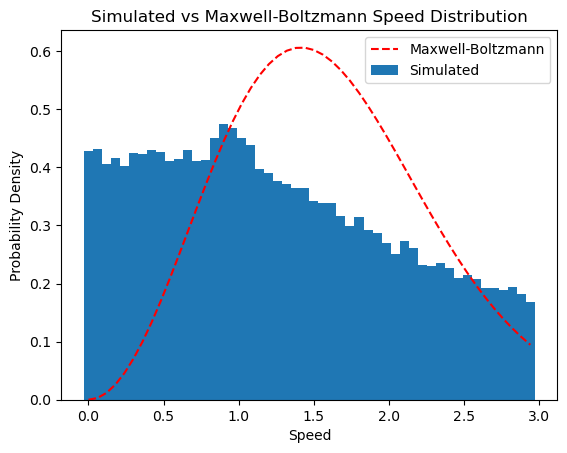

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kB = 1.0  # Boltzmann constant (in reduced units)
m = 1.0   # Mass of the particles (in reduced units)

# Simulation parameters
num_particles = 1000
time_steps = 1000
dt = 0.01

# Initial speed of particles
initial_speed = 1.0

# Binning for speed distribution
num_bins = 50
bin_edges = np.linspace(0, 3, num_bins + 1)

# Arrays to store speed distributions and counts
speed_distribution_simulated = np.zeros(num_bins)
speed_distribution_maxwell = np.zeros(num_bins)
counts_in_bins = np.zeros(num_bins)

# Function to calculate Maxwell-Boltzmann distribution
def maxwell_distribution(v):
    return (4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kB))) / (kB**(3/2))

# Molecular dynamics simulation
velocities = initial_speed * np.ones(num_particles)

for step in range(time_steps):
    # Update velocities using simple integration
    velocities += np.random.normal(0, np.sqrt(kB / m), num_particles) * np.sqrt(dt)

    # Record speed distribution and counts after every 10 time steps
    if step % 10 == 0:
        # Calculate speed for each particle
        speeds = np.abs(velocities)

        # Update simulated speed distribution
        speed_distribution_simulated += np.histogram(speeds, bins=bin_edges)[0]

        # Update Maxwell distribution
        speed_distribution_maxwell += maxwell_distribution(bin_edges[:-1])

        # Count the number of particles in each bin
        counts_in_bins += np.histogram(speeds, bins=bin_edges)[0]

# Normalize the distributions
speed_distribution_simulated /= np.sum(speed_distribution_simulated) * (bin_edges[1] - bin_edges[0])
speed_distribution_maxwell /= np.sum(speed_distribution_maxwell) * (bin_edges[1] - bin_edges[0])

# Display the tabulated counts
print("Tabulated Number of Atoms in Each Bin:")
print("Speed Range\t\tNumber of Atoms")
for i in range(num_bins):
    print(f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}\t\t{int(counts_in_bins[i])}")

# Plotting the simulated and Maxwell speed distributions
plt.bar(bin_edges[:-1], speed_distribution_simulated, width=(bin_edges[1] - bin_edges[0]), label='Simulated')
plt.plot(bin_edges[:-1], speed_distribution_maxwell, label='Maxwell-Boltzmann', linestyle='--', color='red')
plt.xlabel('Speed')
plt.ylabel('Probability Density')
plt.title('Simulated vs Maxwell-Boltzmann Speed Distribution')
plt.legend()
plt.show()


Tabulated Number of Atoms in Each Bin:
Speed Range		Number of Atoms
0.00 - 0.06		1929
0.06 - 0.12		1950
0.12 - 0.18		1922
0.18 - 0.24		1963
0.24 - 0.30		2043
0.30 - 0.36		1947
0.36 - 0.42		1972
0.42 - 0.48		1854
0.48 - 0.54		2017
0.54 - 0.60		2036
0.60 - 0.66		1984
0.66 - 0.72		1897
0.72 - 0.78		1967
0.78 - 0.84		2075
0.84 - 0.90		2155
0.90 - 0.96		2280
0.96 - 1.02		2148
1.02 - 1.08		2200
1.08 - 1.14		2042
1.14 - 1.20		1964
1.20 - 1.26		1885
1.26 - 1.32		1906
1.32 - 1.38		1784
1.38 - 1.44		1706
1.44 - 1.50		1773
1.50 - 1.56		1730
1.56 - 1.62		1645
1.62 - 1.68		1648
1.68 - 1.74		1578
1.74 - 1.80		1524
1.80 - 1.86		1417
1.86 - 1.92		1440
1.92 - 1.98		1304
1.98 - 2.04		1354
2.04 - 2.10		1316
2.10 - 2.16		1267
2.16 - 2.22		1192
2.22 - 2.28		1176
2.28 - 2.34		1157
2.34 - 2.40		1109
2.40 - 2.46		1043
2.46 - 2.52		1041
2.52 - 2.58		972
2.58 - 2.64		937
2.64 - 2.70		921
2.70 - 2.76		977
2.76 - 2.82		870
2.82 - 2.88		829
2.88 - 2.94		788
2.94 - 3.00		740


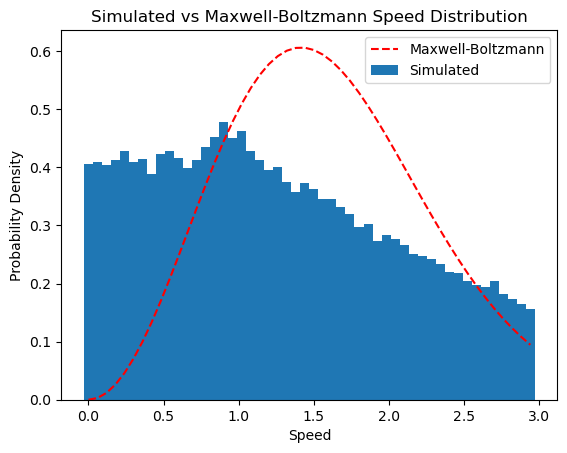

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kB = 1.0  # Boltzmann constant (in reduced units)
m = 1.0   # Mass of the particles (in reduced units)

# Simulation parameters
num_particles = 1000
time_steps = 1000
dt = 0.01

# Initial speed of particles
initial_speed = 1.0  # Change this to set the initial speed

# Binning for speed distribution
num_bins = 50
bin_edges = np.linspace(0, 3, num_bins + 1)

# Arrays to store speed distributions and counts
speed_distribution_simulated = np.zeros(num_bins)
speed_distribution_maxwell = np.zeros(num_bins)
counts_in_bins = np.zeros(num_bins)

# Function to calculate Maxwell-Boltzmann distribution
def maxwell_distribution(v):
    return (4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kB))) / (kB**(3/2))

# Molecular dynamics simulation
velocities = initial_speed * np.ones(num_particles)

for step in range(time_steps):
    # Update velocities using simple integration
    velocities += np.random.normal(0, np.sqrt(kB / m), num_particles) * np.sqrt(dt)

    # Record speed distribution and counts after every 10 time steps
    if step % 10 == 0:
        # Calculate speed for each particle
        speeds = np.abs(velocities)

        # Update simulated speed distribution
        speed_distribution_simulated += np.histogram(speeds, bins=bin_edges)[0]

        # Update Maxwell distribution
        speed_distribution_maxwell += maxwell_distribution(bin_edges[:-1])

        # Count the number of particles in each bin
        counts_in_bins += np.histogram(speeds, bins=bin_edges)[0]

# Normalize the distributions
speed_distribution_simulated /= np.sum(speed_distribution_simulated) * (bin_edges[1] - bin_edges[0])
speed_distribution_maxwell /= np.sum(speed_distribution_maxwell) * (bin_edges[1] - bin_edges[0])

# Display the tabulated counts
print("Tabulated Number of Atoms in Each Bin:")
print("Speed Range\t\tNumber of Atoms")
for i in range(num_bins):
    print(f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}\t\t{int(counts_in_bins[i])}")

# Plotting the simulated and Maxwell speed distributions
plt.bar(bin_edges[:-1], speed_distribution_simulated, width=(bin_edges[1] - bin_edges[0]), label='Simulated')
plt.plot(bin_edges[:-1], speed_distribution_maxwell, label='Maxwell-Boltzmann', linestyle='--', color='red')
plt.xlabel('Speed')
plt.ylabel('Probability Density')
plt.title('Simulated vs Maxwell-Boltzmann Speed Distribution')
plt.legend()
plt.show()


Tabulated Number of Atoms in Each Bin:
Speed Range		Number of Atoms
1.00 - 1.04		1435
1.04 - 1.08		1418
1.08 - 1.12		1406
1.12 - 1.16		1379
1.16 - 1.20		1297
1.20 - 1.24		1317
1.24 - 1.28		1243
1.28 - 1.32		1253
1.32 - 1.36		1180
1.36 - 1.40		1180
1.40 - 1.44		1119
1.44 - 1.48		1149
1.48 - 1.52		1112
1.52 - 1.56		1108
1.56 - 1.60		1027
1.60 - 1.64		1078
1.64 - 1.68		1041
1.68 - 1.72		1021
1.72 - 1.76		964
1.76 - 1.80		1003
1.80 - 1.84		924
1.84 - 1.88		887
1.88 - 1.92		943
1.92 - 1.96		858
1.96 - 2.00		940
2.00 - 2.04		885
2.04 - 2.08		867
2.08 - 2.12		873
2.12 - 2.16		824
2.16 - 2.20		769
2.20 - 2.24		807
2.24 - 2.28		788
2.28 - 2.32		797
2.32 - 2.36		725
2.36 - 2.40		730
2.40 - 2.44		697
2.44 - 2.48		675
2.48 - 2.52		690
2.52 - 2.56		673
2.56 - 2.60		707
2.60 - 2.64		651
2.64 - 2.68		609
2.68 - 2.72		610
2.72 - 2.76		602
2.76 - 2.80		606
2.80 - 2.84		584
2.84 - 2.88		566
2.88 - 2.92		536
2.92 - 2.96		546
2.96 - 3.00		504


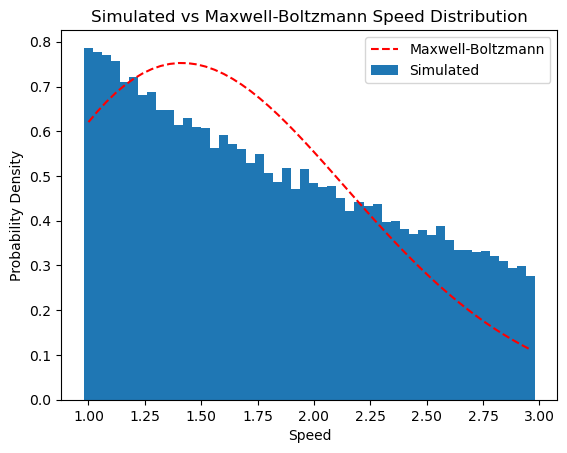

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kB = 1.0  # Boltzmann constant (in reduced units)
m = 1.0   # Mass of the particles (in reduced units)

# Simulation parameters
num_particles = 1000
time_steps = 1000
dt = 0.01

# Initial speed of particles
initial_speed = 1.0  # Change this to set the initial speed

# Binning for speed distribution
num_bins = 50
# Start bin edges from 1.0
bin_edges = np.linspace(1, 3, num_bins + 1)

# Arrays to store speed distributions and counts
speed_distribution_simulated = np.zeros(num_bins)
speed_distribution_maxwell = np.zeros(num_bins)
counts_in_bins = np.zeros(num_bins)

# Function to calculate Maxwell-Boltzmann distribution
def maxwell_distribution(v):
    return (4 * np.pi * v**2 * np.exp(-m * v**2 / (2 * kB))) / (kB**(3/2))

# Molecular dynamics simulation
velocities = initial_speed * np.ones(num_particles)

for step in range(time_steps):
    # Update velocities using simple integration
    velocities += np.random.normal(0, np.sqrt(kB / m), num_particles) * np.sqrt(dt)

    # Record speed distribution and counts after every 10 time steps
    if step % 10 == 0:
        # Calculate speed for each particle
        speeds = np.abs(velocities)

        # Update simulated speed distribution
        speed_distribution_simulated += np.histogram(speeds, bins=bin_edges)[0]

        # Update Maxwell distribution
        speed_distribution_maxwell += maxwell_distribution(bin_edges[:-1])

        # Count the number of particles in each bin
        counts_in_bins += np.histogram(speeds, bins=bin_edges)[0]

# Normalize the distributions
speed_distribution_simulated /= np.sum(speed_distribution_simulated) * (bin_edges[1] - bin_edges[0])
speed_distribution_maxwell /= np.sum(speed_distribution_maxwell) * (bin_edges[1] - bin_edges[0])

# Display the tabulated counts
print("Tabulated Number of Atoms in Each Bin:")
print("Speed Range\t\tNumber of Atoms")
for i in range(num_bins):
    print(f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}\t\t{int(counts_in_bins[i])}")

# Plotting the simulated and Maxwell speed distributions
plt.bar(bin_edges[:-1], speed_distribution_simulated, width=(bin_edges[1] - bin_edges[0]), label='Simulated')
plt.plot(bin_edges[:-1], speed_distribution_maxwell, label='Maxwell-Boltzmann', linestyle='--', color='red')
plt.xlabel('Speed')
plt.ylabel('Probability Density')
plt.title('Simulated vs Maxwell-Boltzmann Speed Distribution')
plt.legend()
plt.show()
